In [1]:
!pip install split-folders

In [2]:
from keras.preprocessing.image import ImageDataGenerator , load_img , img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense
import matplotlib.pyplot as plt

import numpy as np
from skimage import transform
import splitfolders
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns

import splitfolders

In [3]:
splitfolders.ratio(
    "../input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone",
   output="./dataset",
   seed=7,
   ratio=(0.90,0.050, 0.050)
)

Copying files: 12446 files [01:55, 107.81 files/s]


In [4]:
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_dataset = train_datagen.flow_from_directory('./dataset/train',
                                                  target_size=(200, 200),
                                                  color_mode='grayscale', 
                                                  class_mode='categorical', 
                                                  batch_size=100,
                                                  )

test_dataset = test_datagen.flow_from_directory('./dataset/test',
                                                target_size=(200, 200),
                                                class_mode='categorical',
                                                color_mode='grayscale',
                                                batch_size=100,
                                                shuffle=False
                                                )

valid_dataset = valid_datagen.flow_from_directory('./dataset/val',
                                                  target_size=(200, 200),
                                                  class_mode='categorical',
                                                  batch_size=100,
                                                  color_mode='grayscale',
                                                  )


Found 11200 images belonging to 4 classes.
Found 626 images belonging to 4 classes.
Found 620 images belonging to 4 classes.


In [5]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=train_dataset.image_shape))
model.add(MaxPool2D(2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2))


model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2))


model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2))


model.add(Flatten())

model.add(Dense(512, activation='relu'))


model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        3

In [6]:
import keras
METRICS = [
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall')
    ]
    
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=METRICS)

In [7]:
Info = model.fit(
                 train_dataset,
                 validation_data=valid_dataset,
                 epochs=5,
                 )

Epoch 1/5
112/112 [==============================] - 86s 697ms/step - loss: 1.1746 - accuracy: 0.5450 - precision: 0.6336 - recall: 0.2975 - val_loss: 0.8100 - val_accuracy: 0.6935 - val_precision: 0.7419 - val_recall: 0.5935
Epoch 2/5
112/112 [==============================] - 78s 699ms/step - loss: 0.7025 - accuracy: 0.7271 - precision: 0.7711 - recall: 0.6581 - val_loss: 0.2362 - val_accuracy: 0.9258 - val_precision: 0.9465 - val_recall: 0.9129
Epoch 3/5
112/112 [==============================] - 78s 694ms/step - loss: 0.2014 - accuracy: 0.9286 - precision: 0.9351 - recall: 0.9215 - val_loss: 0.0170 - val_accuracy: 0.9968 - val_precision: 0.9968 - val_recall: 0.9968
Epoch 4/5
112/112 [==============================] - 78s 694ms/step - loss: 0.1071 - accuracy: 0.9718 - precision: 0.9734 - recall: 0.9705 - val_loss: 0.0043 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/5
112/112 [==============================] - 78s 693ms/step - loss: 0.1133 - accuracy: 0

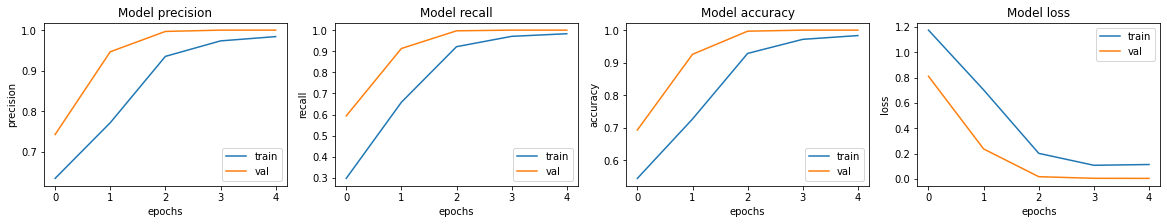

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(Info.history[met])
    ax[i].plot(Info.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [9]:
predictions = model.predict(test_dataset)

In [10]:
predictions

array([[9.9947363e-01, 4.7603059e-08, 5.2241539e-04, 3.9632350e-06],
       [9.9957258e-01, 3.4760257e-07, 3.6335902e-04, 6.3697531e-05],
       [9.9931645e-01, 1.1309082e-06, 3.8150357e-04, 3.0102264e-04],
       ...,
       [4.5300955e-10, 7.6004746e-04, 4.6700623e-07, 9.9923944e-01],
       [2.0035518e-04, 5.1241765e-05, 2.5706999e-05, 9.9972266e-01],
       [9.9663273e-04, 8.3660227e-05, 5.8502919e-05, 9.9886131e-01]],
      dtype=float32)

In [11]:
diseases_labels = []

for key, value in train_dataset.class_indices.items():
   diseases_labels.append(key)

In [12]:
def evaluate(actual, predictions):
  pre = []
  for i in predictions:
    pre.append(np.argmax(i))

  accuracy = (pre == actual).sum() / actual.shape[0]
  print(f'Accuracy: {accuracy}')

  precision, recall, f1_score, _ = precision_recall_fscore_support(actual, pre, average='macro')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1_score: {f1_score}')

  fig, ax = plt.subplots(figsize=(20,20))
  conf_mat = confusion_matrix(actual, pre)
  sns.heatmap(conf_mat, annot=True, fmt='.0f', cmap="YlGnBu", xticklabels=diseases_labels, yticklabels=diseases_labels).set_title('Confusion Matrix Heat map')
  plt.show()

Accuracy: 0.9984025559105432
Precision: 0.9990234375
Recall: 0.9978260869565218
F1_score: 0.9984190601526248


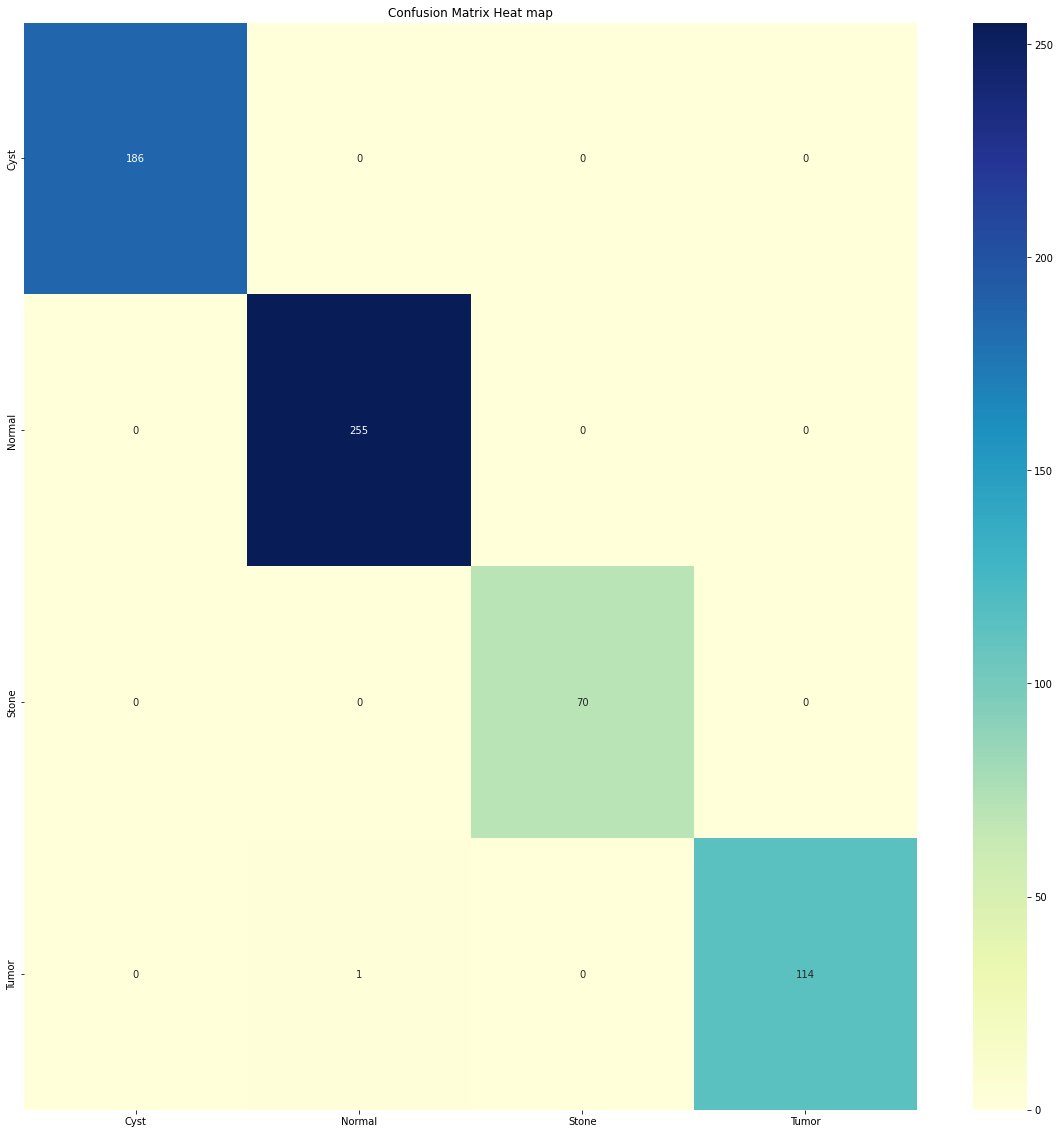

In [13]:
evaluate(test_dataset.classes,predictions)

In [14]:
model.evaluate(test_dataset)

7/7 [==============================] - 4s 557ms/step - loss: 0.0070 - accuracy: 0.9984 - precision: 0.9984 - recall: 0.9984


[0.007006118074059486,
 0.9984025359153748,
 0.9984025359153748,
 0.9984025359153748]